# A S Sathvik

## In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Feature Information:
    
    Hours - The number of hours spent on studying
    
    Score - The Score of the student.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the Dataset
data = pd.read_csv('student_scores - student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis

In [4]:
data.shape

(25, 2)

Inference: The dataset contains 2 features and 25 data points.

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Inference: The standard deviation is minimal from the mean.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Inference: The dataset contains integer and float datatype features and no Categorical features.

In [36]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Inference: Both the features do not contain any Null values.

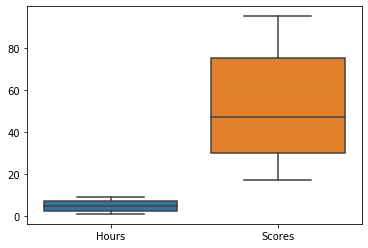

In [7]:
#Checking for Outliers
sns.boxplot(data=data)

Inference: There are no Outliers present and hence no treatment required.

Hours     0.190338
Scores    0.233965
dtype: float64

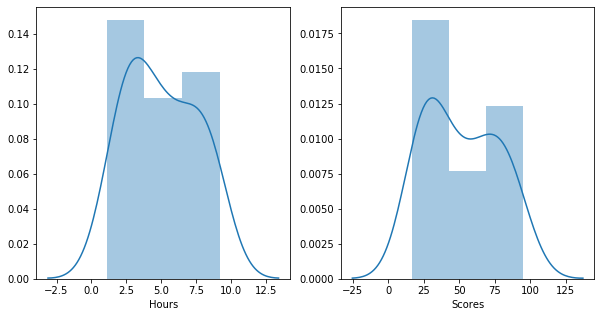

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.distplot(data.Hours, ax=ax[0])
sns.distplot(data.Scores, ax=ax[1])
data.skew()

Inference: From the above graphs we can observe that both the features are normally distributed with little amount of Right Skewness.

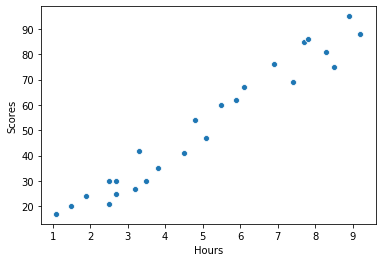

In [9]:
#Scatter Plot
sns.scatterplot(x=data.Hours, y=data.Scores)

Inference: From the above scatter plot, we can observe that both the features show Linear Characteristics.

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


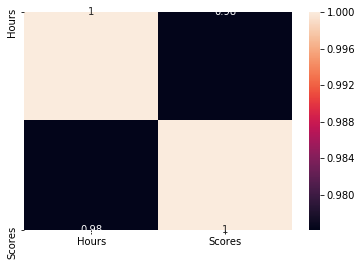

In [10]:
#Correlation between the two features
sns.heatmap(data.corr(),annot=True)
print(data.corr())

Inference: From the above correlation table and the heatmap, we can see that both the feature highly correlated with each other with 0.976191 correlation coefficient.

## Model Building

In [13]:
x = data['Hours']
y = data['Scores']
x = x.to_frame()

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=.2, random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)
print("accuracy: ",r2_score(y_test, lr.predict(X_test)))
print("rmse: ",np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

accuracy:  0.9454906892105356
rmse:  4.6474476121003665


Inference: The model is 94.55% Accurate and with RMSE of 4.65.

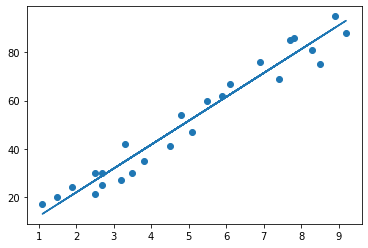

In [17]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [18]:
#Predicting the scores
y_pred = lr.predict(X_test)
data_final = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_final

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [29]:
# Lets us consider three different number of hours spent to study and predict the score.
x_final=pd.DataFrame([9.25,3.5,6.15])
y_final=lr.predict(x_final)
y_final

array([93.69173249, 36.70545772, 62.9686974 ])

## Model Evaluation

There are many metrics for evaluating a Regression model.

1. Mean Squared Error(MSE)

2. Root-Mean-Squared-Error(RMSE).

3. Mean-Absolute-Error(MAE).

4. R² or Coefficient of Determination.

5. Adjusted R²

In [32]:
#Mean Squared Error
print("The Mean Squared Error is ", mean_squared_error(y_test,y_pred))

The Mean Squared Error is  21.5987693072174


In [33]:
#Root Mean Squared Error
print("The Root Mean Squared Error is ", np.sqrt(mean_squared_error(y_test,y_pred)))

The Root Mean Squared Error is  4.6474476121003665


In [34]:
#Mean Absolute Error
print("The Mean Absolute Error is ", mean_absolute_error(y_test,y_pred))

The Mean Absolute Error is  4.183859899002975


In [35]:
#R2_Score
print("The R2_Score is ", r2_score(y_test,y_pred))

The R2_Score is  0.9454906892105356


## Final Conclusion

#### A Regressor model has been designed to predict the Score for the given Number of Hours spent on studying.
#### Based on the given input of 9.25 hours spent on studying, the student would score 93.69 Marks.